In [1]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import adjusted_rand_score

In [3]:
sys.path.append('..')
from pygraphs.cluster import KernelKMeans, Ward, KernelKMeansSklearn, KernelWardSklearn
from pygraphs.graphs.generators import StochasticBlockModel, RubanovModel
from pygraphs.measure import *
from pygraphs.measure import H_kernels_plus_RSP_FE, scaler
from pygraphs.scenario import ParallelByGraphs, plot_results

In [15]:
sbm_graphs, _ = StochasticBlockModel(100, 2, 0.3, 0.1).generate_graphs(200)
rubanov_graphs, _ = RubanovModel(np.array([50, 50]), np.array([[0.3, 0.1],
                                                               [0.1, 0.3]])).generate_graphs(200)

In [16]:
H_kernels_plus_RSP_FE, len(H_kernels_plus_RSP_FE)

([pygraphs.measure.kernel.pWalk_H,
  pygraphs.measure.produced.Walk_H,
  pygraphs.measure.kernel.For_H,
  pygraphs.measure.produced.logFor_H,
  pygraphs.measure.kernel.Comm_H,
  pygraphs.measure.produced.logComm_H,
  pygraphs.measure.kernel.Heat_H,
  pygraphs.measure.produced.logHeat_H,
  pygraphs.measure.kernel.SCT_H,
  pygraphs.measure.kernel.SCCT_H,
  pygraphs.measure.produced.SPCT_H,
  pygraphs.measure.produced.RSP_K,
  pygraphs.measure.produced.FE_K],
 13)

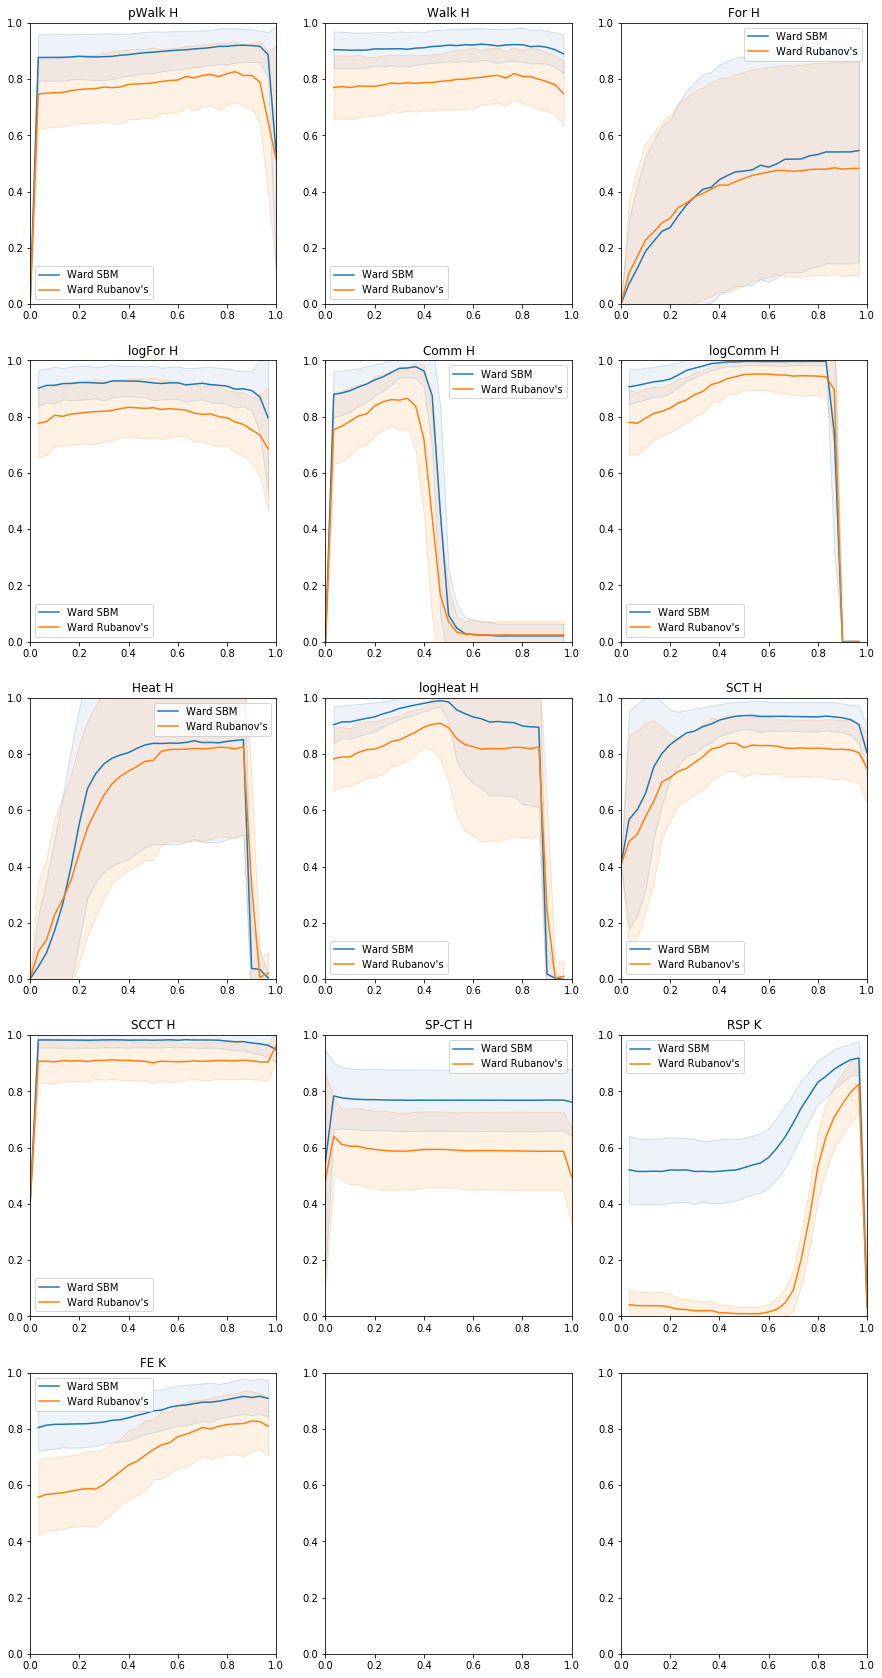

In [17]:
fig, ax = plt.subplots(5, 3, figsize=(15, 30))
for idx, measure in enumerate(tqdm(H_kernels_plus_RSP_FE)):
    axi = ax[idx // 3][idx % 3]
    pbg = ParallelByGraphs(adjusted_rand_score, np.linspace(0, 1, 31), progressbar=False, verbose=False)
    plot_results(axi, [
        ('Ward SBM', *pbg.perform(Ward, measure, sbm_graphs, 2, n_jobs=-1)),
        ('Ward Rubanov\'s', *pbg.perform(Ward, measure, rubanov_graphs, 2, n_jobs=-1))
    ])
    axi.set_title(measure.name)
    axi.legend()

In [9]:
sbm_graphs, _ = StochasticBlockModel(100, 2, 0.3, 0.1).generate_graphs(500)
rubanov_graphs, _ = RubanovModel(np.array([50, 50]), np.array([[0.3, 0.15],
                                                               [0.15, 0.3]])).generate_graphs(500)

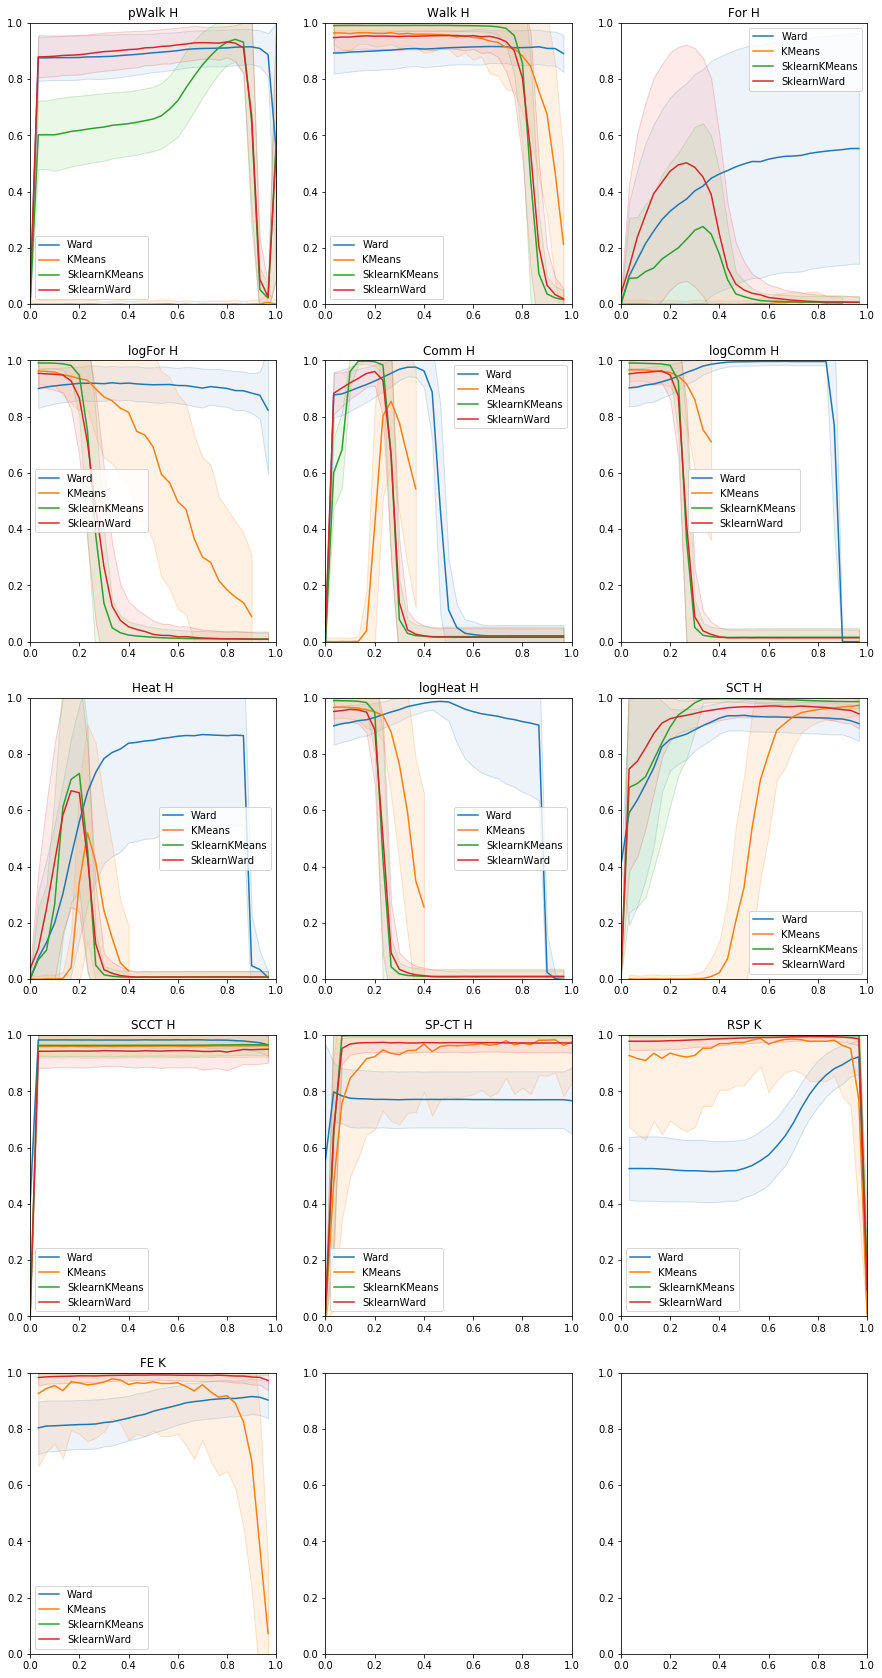

In [10]:
fig, ax = plt.subplots(5, 3, figsize=(15, 30))
for idx, measure in enumerate(tqdm(H_kernels_plus_RSP_FE)):
    axi = ax[idx // 3][idx % 3]
    pbg = ParallelByGraphs(adjusted_rand_score, np.linspace(0, 1, 31), progressbar=False, verbose=False)
    plot_results(axi, [
        ('Ward', *pbg.perform(Ward, measure, sbm_graphs, 2, n_jobs=-1)),
        ('KMeans', *pbg.perform(KernelKMeans, measure, sbm_graphs, 2, n_jobs=-1)),
        ('SklearnKMeans', *pbg.perform(KernelKMeansSklearn, measure, sbm_graphs, 2, n_jobs=-1)),
        ('SklearnWard', *pbg.perform(KernelWardSklearn, measure, sbm_graphs, 2, n_jobs=-1))
    ])
    axi.set_title(measure.name)
    axi.legend()